## Question 2

(30 pts) Carry out an exploratory data analysis on the provided Defaulters Dataset. Identify how
to optimally build a Logistic Regression classifier for the given dataset. Tune the model and
explain your process and the results.


## 1. Investigating Data

In [407]:
import pandas as pd
import numpy as np
df = pd.read_csv('defaultersDataset.csv')
df.head()

,﻿ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Checking for Null Values

In [408]:
print(df.shape)
print(df.isnull().sum()) # checking null values

(22003, 25)
﻿ID                           0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


### Checking Data Types

In [409]:
df.dtypes

﻿ID                           int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

### Investing values of categorical columns

#### 1. Marriage

In [410]:
df.MARRIAGE.value_counts()

2    11888
1     9830
3      249
0       36
Name: MARRIAGE, dtype: int64

##### Observation
* 1 - Married
* 2 - Single
* 3 - Others
* 0 - These must be unknown or NA.We will deal with them later.

#### 2. SEX

In [411]:
df.SEX.value_counts()

2    13232
1     8771
Name: SEX, dtype: int64

##### Observation
* 1 - Male
* 2 - Female

#### 3. Education

In [412]:
df.EDUCATION.value_counts()

2    10398
1     7788
3     3522
5      180
4       73
6       32
0       10
Name: EDUCATION, dtype: int64

##### Observation
* 1 - Graduate
* 2 - University
* 3 - High School
* 4 - Others
* 5 - Unknown
* 6 - Unknown
* 0 - These must be unknown or NA.
##### We will club 5,6,0 together since they belong to the same category. This will help in generating fewer columns in OHE.

In [413]:
df.PAY_6.value_counts()

 0    11846
-1     4326
-2     3389
 2     2193
 3      150
 7       37
 4       35
 6       16
 5        9
 8        2
Name: PAY_6, dtype: int64

## 2. Exploratory Data Analysis

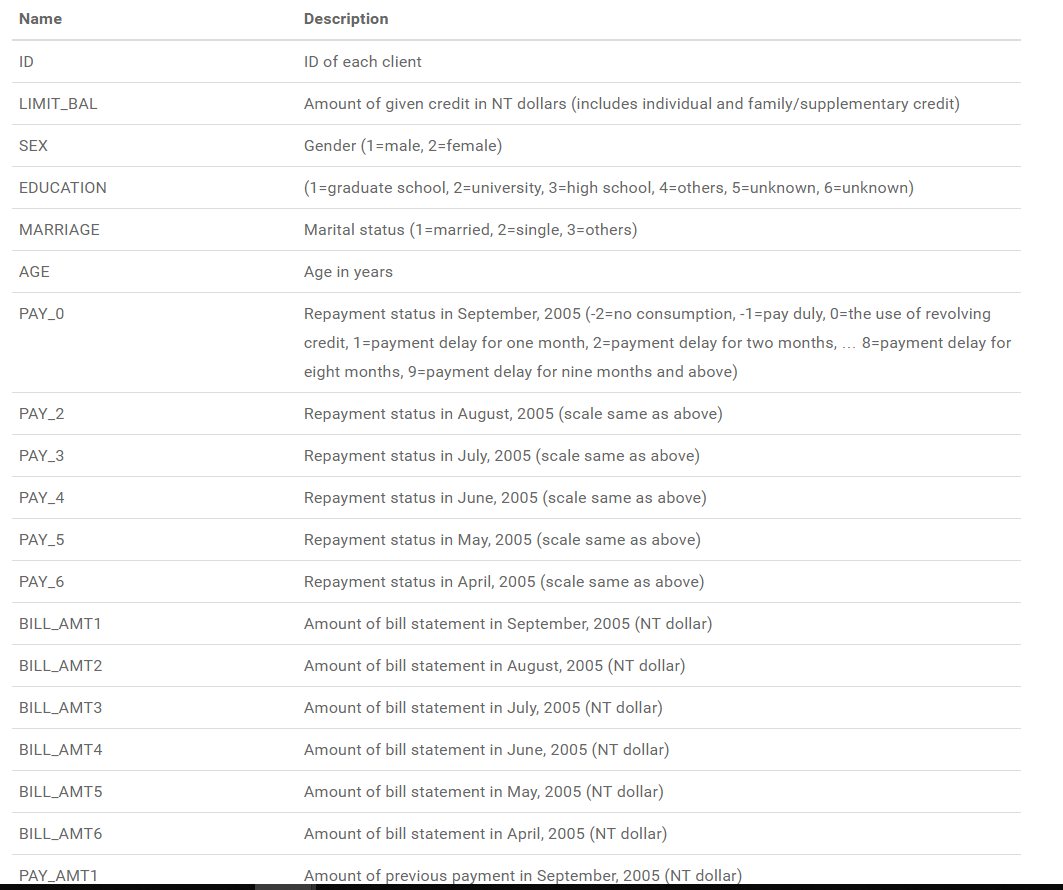

In [414]:
from IPython.display import Image
Image(filename="Default.png",width=800,height=400)

In [415]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,22003.000000,22003.000000,2.200300e+04,22003.000000,22003.000000,22003.000000
mean,50332.186293,48389.110030,4.609495e+04,41967.374131,39767.853384,38351.495841
std,71743.657762,69560.605573,6.740033e+04,62189.212615,59681.708466,58818.219040
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-46627.000000,-339603.000000
25%,3806.000000,3232.500000,2.896500e+03,2395.500000,1789.000000,1241.000000
50%,22701.000000,21790.000000,2.024500e+04,19037.000000,18258.000000,17151.000000
75%,65503.500000,62670.500000,5.911300e+04,51751.000000,49630.000000,48751.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [416]:
df.describe()

,﻿ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,22003.000000,22003.000000,22003.000000,22003.000000,22003.000000,22003.00000,22003.000000,22003.000000,22003.000000,22003.000000,...,22003.000000,22003.000000,22003.000000,22003.000000,2.200300e+04,22003.000000,22003.000000,22003.000000,22003.000000,22003.000000
mean,11002.000000,162957.945735,1.601373,1.842203,1.561287,35.32341,0.019452,-0.103213,-0.134527,-0.194201,...,41967.374131,39767.853384,38351.495841,5502.919102,5.789052e+03,4842.480253,4687.026996,4689.091987,5094.595146,0.227605
std,6351.863322,128613.702016,0.489627,0.775328,0.521691,9.35336,1.122035,1.200108,1.205271,1.166511,...,62189.212615,59681.708466,58818.219040,15156.873274,2.129170e+04,15984.551072,14859.258686,15031.762459,17404.165514,0.419296
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.00000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5501.500000,50000.000000,1.000000,1.000000,1.000000,28.00000,-1.000000,-1.000000,-1.000000,-1.000000,...,2395.500000,1789.000000,1241.000000,1000.000000,7.800000e+02,350.000000,269.500000,230.500000,27.500000,0.000000
50%,11002.000000,130000.000000,2.000000,2.000000,2.000000,34.00000,0.000000,0.000000,0.000000,0.000000,...,19037.000000,18258.000000,17151.000000,2091.000000,2.000000e+03,1642.000000,1500.000000,1500.000000,1436.000000,0.000000
75%,16502.500000,230000.000000,2.000000,2.000000,2.000000,41.00000,0.000000,0.000000,0.000000,0.000000,...,51751.000000,49630.000000,48751.000000,5000.000000,5.000000e+03,4130.500000,4000.000000,4000.000000,4000.000000,0.000000
max,22003.000000,1000000.000000,2.000000,6.000000,3.000000,79.00000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,497000.000000,417990.000000,528666.000000,1.000000


#### Inference
* There are 22003 unique credit card users
* The average credit limit is 162957.9 the standard deviation is large with max limit being 1000000
* Education level is mostly Graduate School and University
* Average age of user is around 35 and std is 9 with max age of 79 
* The mean bill_amount is increasing from April(Bill_Amt6) to September (Bill_Amt1)
* mean default is 0.22 ie only 22% are defaulters in the above dataset

In [417]:
#Converting Sex, Education, Marriage and PAY to categorical 
cat_columns = ['SEX','EDUCATION','MARRIAGE','default_payment_next_month']
for column in cat_columns:
    df[column] = df[column].astype('category')
    
df.dtypes

﻿ID                              int64
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default_payment_next_month    category
dtype: object

In [418]:
#Renaming column PAY_0 to PAY_1 to follow the convention 
df = df.rename(columns={'PAY_0':'PAY_1'})
df.columns

Index(['﻿ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Default')

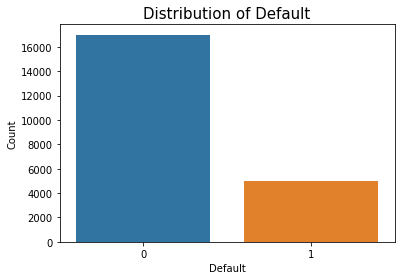

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.countplot(df['default_payment_next_month'])
g.set_xlabel("Default")
g.set_ylabel("Count")
g.set_title("Distribution of Default",fontsize=15)

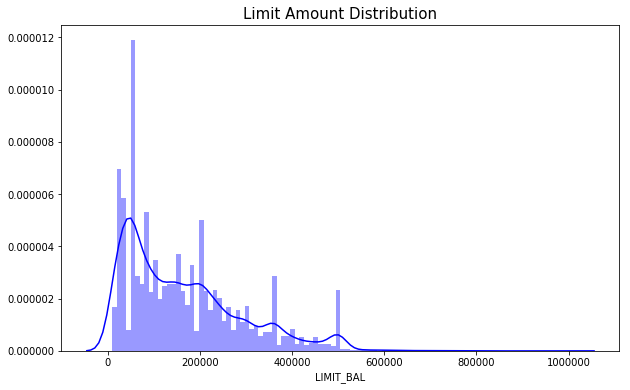

In [420]:
plt.figure(figsize = (10,6))
plt.title('Limit Amount Distribution',fontsize=15)
sns.distplot(df['LIMIT_BAL'],kde=True,bins=100,color='blue')
plt.show()

#### Inference
* Large number of users have limit of around 50000

In [421]:
df['LIMIT_BAL'].value_counts().head(10)

50000     2590
20000     1516
30000     1277
80000     1161
200000    1095
150000     808
100000     761
180000     718
360000     626
60000      623
Name: LIMIT_BAL, dtype: int64

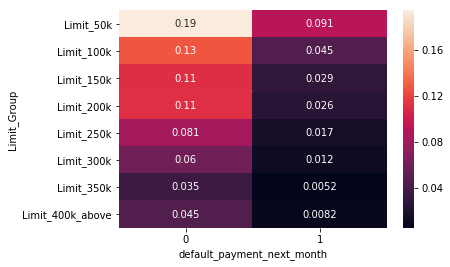

In [422]:
df['Limit_Group'] = pd.cut(df.LIMIT_BAL, [0,50000,100000,150000,200000,250000,300000,350000,400000], labels=["Limit_50k","Limit_100k","Limit_150k","Limit_200k","Limit_250k","Limit_300k","Limit_350k","Limit_400k_above"],include_lowest=True) #1st bin: 0-50k, 2nd :50001-100000

sns.heatmap(pd.crosstab(df['Limit_Group'],df['default_payment_next_month'],normalize=True), annot=True, cbar=True) #cmap="YlGnBu"

#### Inference
* There are high number of defaulters whose credit limit is 50k or below followed by limit 100k. Lets investigate further.

In [423]:
pd.crosstab([df['Limit_Group'],df['MARRIAGE'],df['SEX']],df['default_payment_next_month'],margins=True).head(20)

default_payment_next_month     0    1   All
Limit_Group MARRIAGE SEX                   
Limit_50k   0        1         4    0     4
                     2         7    0     7
            1        1       624  331   955
                     2       863  448  1311
            2        1      1267  554  1821
                     2      1176  517  1693
            3        1        45   20    65
                     2        45   23    68
Limit_100k  0        1         1    1     2
                     2         5    0     5
            1        1       321  158   479
                     2       759  307  1066
            2        1       530  174   704
                     2       995  294  1289
            3        1         9    6    15
                     2        28    4    32
Limit_150k  0        1         2    0     2
                     2         5    0     5
            1        1       297  119   416
                     2       647  153   800

#### Inference
* Married women tend to default more with credit limit 50k
* Single men tend to default more with credit limit 50k
* For credit limit 50k-100k we can see either married or unmarried but females tend to default more.

In [424]:
pd.crosstab([df['Limit_Group'],df['EDUCATION']],df['default_payment_next_month'],margins=True).head(20)

default_payment_next_month     0     1   All
Limit_Group EDUCATION                       
Limit_50k   0                  1     0     1
            1                795   343  1138
            2               2252  1069  3321
            3                935   474  1409
            4                  2     0     2
            5                 36     6    42
            6                 10     1    11
Limit_100k  0                  1     0     1
            1                697   231   928
            2               1393   529  1922
            3                518   181   699
            4                  8     2    10
            5                 24     1    25
            6                  7     0     7
Limit_150k  0                  0     0     0
            1                823   225  1048
            2               1080   276  1356
            3                353    97   450
            4                 12     1    13
            5                 30     3    33

Text(0.5, 1.0, 'Education Wise Default')

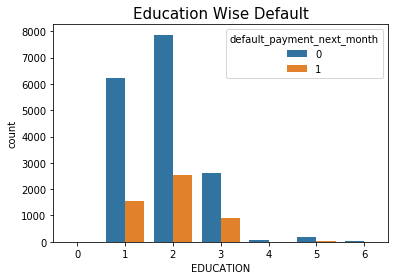

In [425]:
g = sns.countplot(df['EDUCATION'],hue=df['default_payment_next_month'])
g.set_title('Education Wise Default',fontsize=15)

#### Inference 
* There are a high number of defaulters belonging to Education category 2 ie University followed by category 1 ie Graduate

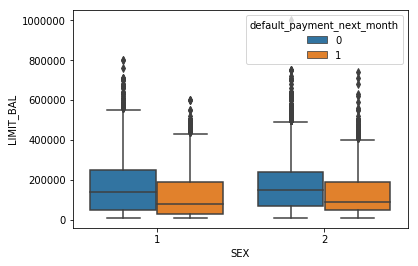

In [426]:
sns.boxplot(x=df['SEX'],y=df['LIMIT_BAL'],hue=df['default_payment_next_month'])

#### Inference
* The distribution of credit limit is approximately same over males and females.

Text(0.5, 1.0, 'SEX Wise Default')

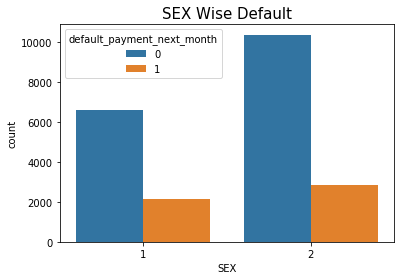

In [427]:
g = sns.countplot(df['SEX'],hue=df['default_payment_next_month'])
g.set_title('SEX Wise Default',fontsize=15)

#### Inference
* Nothing can be really said here since the proportion of females is larger. We can say that males and females tend to default equally overall.
* We can see that this dataset contains more number of female customers. 

In [428]:
print(np.min(df['AGE']))
print(np.max(df['AGE']))

21
79


Text(0.5, 1.0, 'Age Group Wise Default')

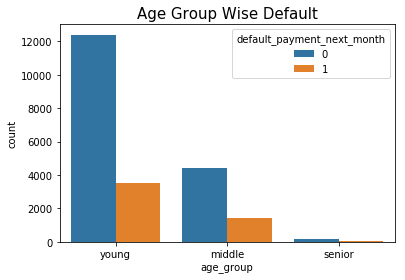

In [429]:
df['age_group'] = pd.cut(df.AGE, [21,40,60,79], labels=["young","middle","senior"])
g = sns.countplot(df['age_group'],hue=df['default_payment_next_month'])
g.set_title('Age Group Wise Default',fontsize=15)

#### Inference
* Young and middle age group tend to default more ie of age 21-55
* The percentage of Young people in the dataset is more indicating that mostly people belonging to this category use credit cards.

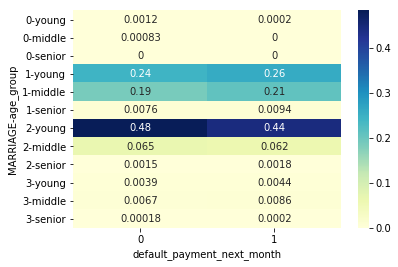

In [430]:
sns.heatmap(pd.crosstab([df['MARRIAGE'],df['age_group']],df['default_payment_next_month'],normalize='columns').head(20),annot=True,cmap='YlGnBu')

#### Inference
* Young and single(marriage status 2) people tend to default more.

In [431]:
df['PAY_TOTAL'] = df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']

In [432]:
df['PAY_TOTAL'].value_counts()

 0     7426
-6     1866
 2     1439
-12    1300
-1      977
-4      836
-2      807
-3      780
-5      756
-9      655
 4      545
 3      496
-7      479
 12     478
 6      428
-8      376
 8      356
 5      314
 7      256
 11     256
-10     220
 1      219
 9      141
 10     123
 13     108
-11      64
 14      58
 15      43
 16      38
 20      23
 17      21
 32      20
 28      18
 33      17
 18      17
 31       8
 27       8
 19       7
 21       6
 22       6
 24       5
 25       3
 36       1
 29       1
 30       1
 23       1
Name: PAY_TOTAL, dtype: int64

#### Inference
* People with negative or 0 score are people safe customers they have a high probability of not being default

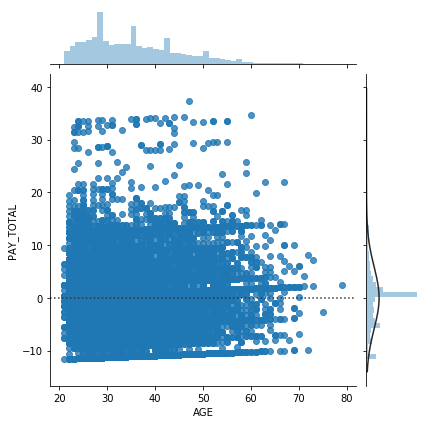

In [433]:
sns.jointplot("AGE", "PAY_TOTAL", df,kind='resid')

#### Inference
* We can clearly see that payment default are being done more by age group of 21 to 55 yrs 
* beyond the age of 55yrs patment default falls drstically
* It is the highest withing the age group of 21 to 40 yrs
* Going beyond 30-36 months 

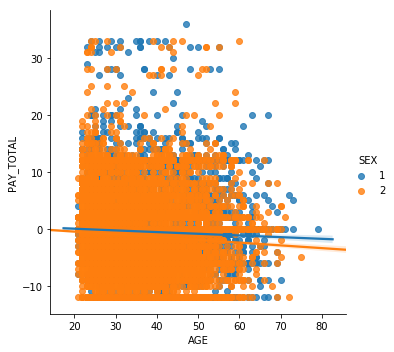

In [434]:
sns.lmplot(x='AGE', y='PAY_TOTAL', data=df, hue ='SEX')

## 3. Data Cleaning 

### 3.1 Handling Unknown / NA values  

#### a. Clubbing status 5,6,0 in Education

In [435]:
df1 = df.copy()

In [436]:
edu = {5:0,6:0} # mapping education code 6,5 to 0
df1['EDUCATION'] = df1['EDUCATION'].astype(int) #Changing levels in category datatypes involves converting them to string first. Else levels arent dropped
df1['EDUCATION'] = df1['EDUCATION'].replace(edu)
df1['EDUCATION'].value_counts()

2    10398
1     7788
3     3522
0      222
4       73
Name: EDUCATION, dtype: int64

####  3.2.1 Deleting Records containing Unknown status
* Since the percentage of records containing 0 is less than 5 % we can delete these records.

In [437]:
df1 = df1[(df1['EDUCATION'] != 0)]
df1['EDUCATION'].value_counts()

2    10398
1     7788
3     3522
4       73
Name: EDUCATION, dtype: int64

In [438]:
df1['MARRIAGE'] = df1['MARRIAGE'].astype(int)
df1 = df1[(df1['MARRIAGE'] != 0)]
df1['MARRIAGE'].value_counts()

2    11776
1     9723
3      246
Name: MARRIAGE, dtype: int64

### 3.2 Detecting Outliers

#### 3.2.1 Calculating Percentage of Outliers

In [439]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR.keys())
IQR.values

Index(['﻿ID', 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'PAY_TOTAL'],
      dtype='object')


array([1.0990e+04, 1.8000e+05, 1.0000e+00, 1.0000e+00, 1.3000e+01,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 6.1123e+04, 5.8930e+04, 5.5909e+04, 4.9125e+04,
       4.7759e+04, 4.7454e+04, 4.0000e+03, 4.2200e+03, 3.7570e+03,
       3.7280e+03, 3.7650e+03, 3.9580e+03, 5.0000e+00])

In [440]:
df_outlier_pct = pd.DataFrame(columns=['Colname','Outlier_Count','Pct'],data=None)

In [441]:
df1.BILL_AMT1.dtype

dtype('int64')

In [442]:
#Calculating percentage of Outliers in each Column
loc = 0
for col in IQR.keys():
    if df1[col].dtype == 'int64':
        outlier_cnt = ((df1[col] < (Q1[col] - 1.5 * IQR[col])) | (df1[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
        df_outlier_pct.loc[loc,'Colname'] = col
        df_outlier_pct.loc[loc,'Outlier_Count'] = outlier_cnt
        df_outlier_pct.loc[loc,'Pct'] = outlier_cnt/len(df1[col])
        loc+=1

In [443]:
print("Outlier Percentage in the Dataset")
df_outlier_pct

Outlier Percentage in the Dataset


,Colname,Outlier_Count,Pct
0,﻿ID,0,0
1,LIMIT_BAL,133,0.00611635
2,AGE,211,0.00970338
3,PAY_1,2395,0.11014
4,PAY_2,3358,0.154426
5,PAY_3,3206,0.147436
6,PAY_4,2591,0.119154
7,PAY_5,2302,0.105863
8,PAY_6,2436,0.112026
9,BILL_AMT1,1745,0.0802483


##### 1. LIMIT_BAL

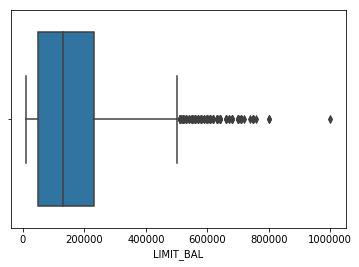

In [444]:
sns.boxplot(df1['LIMIT_BAL'])

In [445]:
df1[df1['LIMIT_BAL'] > 750000]

,﻿ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,Limit_Group,age_group,PAY_TOTAL
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,50784,50723,896040,50000,50000,50256,0,NaN,middle,-1
14919,14920,800000,1,2,1,53,-1,-1,-1,0,...,11145,64657,131,247,9366,63482,0,NaN,middle,-4
18006,18007,800000,1,1,2,46,-2,-2,-2,-1,...,4644,3832,6219,1961,3183,27201,0,NaN,middle,-9
21375,21376,760000,1,3,1,54,0,0,0,0,...,20011,19500,19019,18003,20000,22000,0,NaN,middle,0


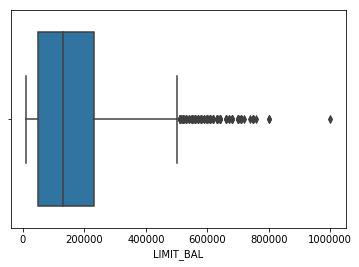

In [446]:
sns.boxplot(df1['LIMIT_BAL'])

##### 2. BILL_AMT1 , BILL_AMT2, BILL_AMT3

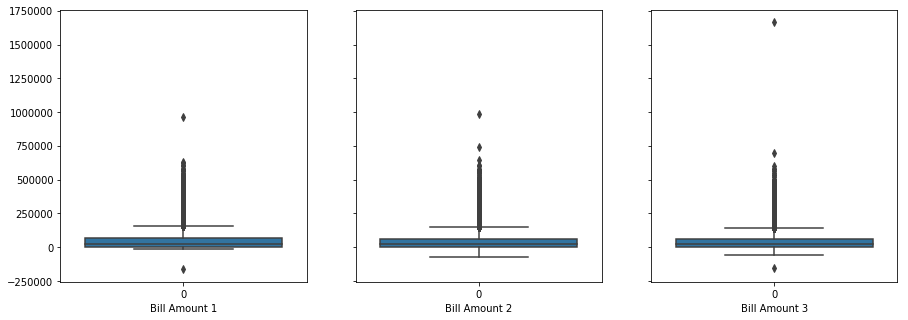

In [447]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.BILL_AMT1,ax=ax1)
g2.set_xlabel("Bill Amount 1")
g4 = sns.boxplot(data=df1.BILL_AMT2,ax=ax2)
g4.set_xlabel("Bill Amount 2")
g7 = sns.boxplot(data=df1.BILL_AMT3,ax=ax3)
g7.set_xlabel("Bill Amount 3")
plt.show()

##### Inference 
* We can see that bill_Amt_1 and bill_Amt_3 have a negative value and bill_Amt_3 has a very exterme value. Lets delete these values and plot box plot again

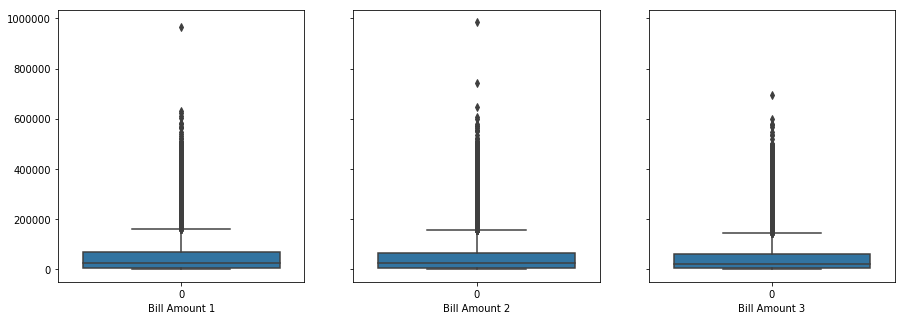

In [448]:
df1 = df1.loc[~(df1['BILL_AMT1']<0)]
df1 = df1.loc[~(df1['BILL_AMT3']<0)]
df1 = df1.loc[~(df1['BILL_AMT2']<0)]
df1 = df1.loc[~(df1['BILL_AMT3']>1500000)]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.BILL_AMT1,ax=ax1)
g2.set_xlabel("Bill Amount 1")
g4 = sns.boxplot(data=df1.BILL_AMT2,ax=ax2)
g4.set_xlabel("Bill Amount 2")
g7 = sns.boxplot(data=df1.BILL_AMT3,ax=ax3)
g7.set_xlabel("Bill Amount 3")
plt.show()

##### 3. BILL_AMT4 , BILL_AMT5, BILL_AMT6

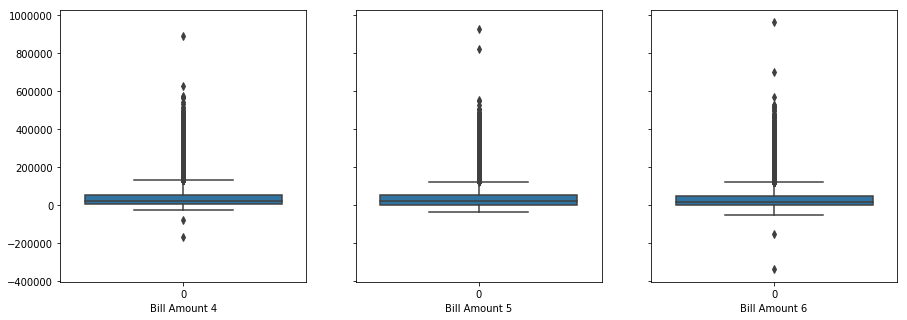

In [449]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.BILL_AMT4,ax=ax1)
g2.set_xlabel("Bill Amount 4")
g4 = sns.boxplot(data=df1.BILL_AMT5,ax=ax2)
g4.set_xlabel("Bill Amount 5")
g7 = sns.boxplot(data=df1.BILL_AMT6,ax=ax3)
g7.set_xlabel("Bill Amount 6")
plt.show()

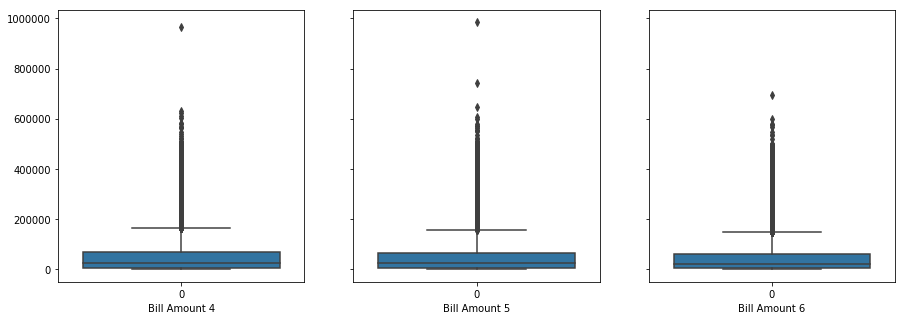

In [450]:
# Filtering out negative values from the dataset
df1 = df1.loc[~(df1['BILL_AMT4']<0)]
df1 = df1.loc[~(df1['BILL_AMT5']<0)]
df1 = df1.loc[~(df1['BILL_AMT6']<0)]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.BILL_AMT1,ax=ax1)
g2.set_xlabel("Bill Amount 4")
g4 = sns.boxplot(data=df1.BILL_AMT2,ax=ax2)
g4.set_xlabel("Bill Amount 5")
g7 = sns.boxplot(data=df1.BILL_AMT3,ax=ax3)
g7.set_xlabel("Bill Amount 6")
plt.show()

##### 4. PAY_AMT1 , PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6

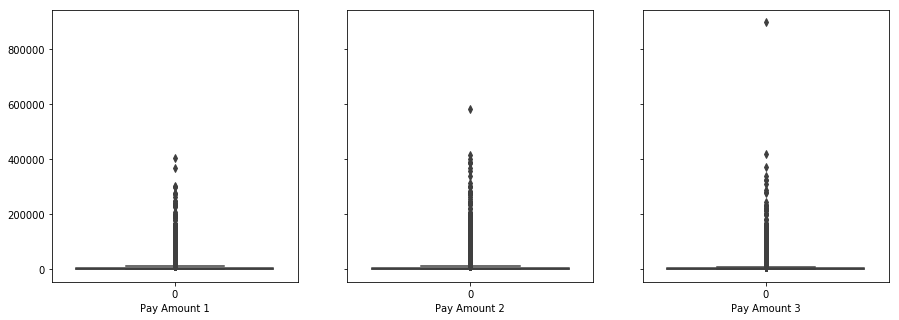

In [451]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.PAY_AMT1,ax=ax1)
g2.set_xlabel("Pay Amount 1")
g4 = sns.boxplot(data=df1.PAY_AMT2,ax=ax2)
g4.set_xlabel("Pay Amount 2")
g7 = sns.boxplot(data=df1.PAY_AMT3,ax=ax3)
g7.set_xlabel("Pay Amount 3")
plt.show()

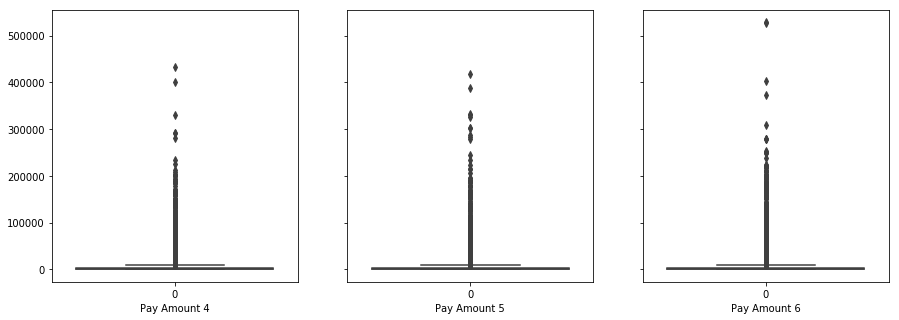

In [452]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.PAY_AMT4,ax=ax1)
g2.set_xlabel("Pay Amount 4")
g4 = sns.boxplot(data=df1.PAY_AMT5,ax=ax2)
g4.set_xlabel("Pay Amount 5")
g7 = sns.boxplot(data=df1.PAY_AMT6,ax=ax3)
g7.set_xlabel("Pay Amount 6")
plt.show()

##### Inference
* We can see that Payment Amounts have too many outliers. Distribution is just a line

### 3.3 Capping Outliers

In [453]:
df1_bkp = df1.copy()

##### 3.3.1 PAY_AMT

In [454]:
#capping outliers
out_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
for col in out_cols:
    percentiles = df1[col].quantile([0.05,0.95]).values
    df1[col][df1[col] <= percentiles[0]] = percentiles[0]
    df1[col][df1[col] >= percentiles[1]] = percentiles[1]

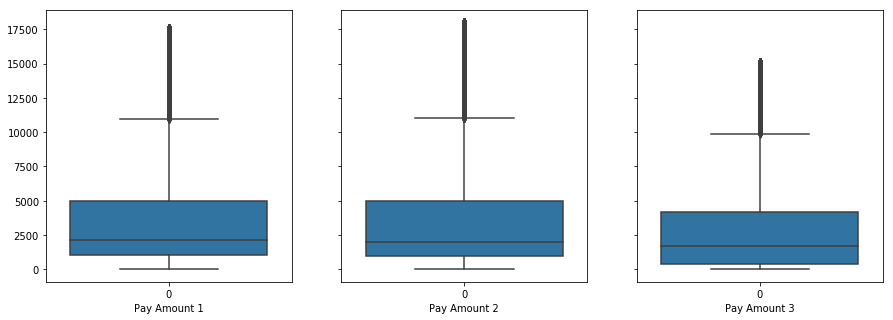

In [455]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.PAY_AMT1,ax=ax1)
g2.set_xlabel("Pay Amount 1")
g4 = sns.boxplot(data=df1.PAY_AMT2,ax=ax2)
g4.set_xlabel("Pay Amount 2")
g7 = sns.boxplot(data=df1.PAY_AMT3,ax=ax3)
g7.set_xlabel("Pay Amount 3")
plt.show()

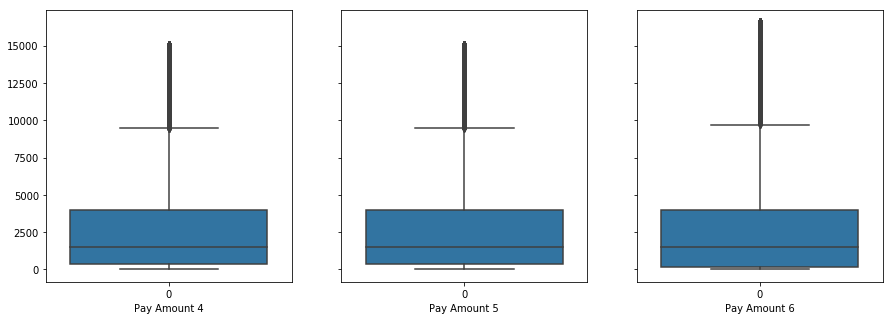

In [456]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.PAY_AMT4,ax=ax1)
g2.set_xlabel("Pay Amount 4")
g4 = sns.boxplot(data=df1.PAY_AMT5,ax=ax2)
g4.set_xlabel("Pay Amount 5")
g7 = sns.boxplot(data=df1.PAY_AMT6,ax=ax3)
g7.set_xlabel("Pay Amount 6")
plt.show()

##### 3.3.2 BILL_AMT and LIMIT_BAL

In [457]:
#capping outliers
out_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','LIMIT_BAL']
for col in out_cols:
    percentiles = df1[col].quantile([0.05,0.95]).values
    df1[col][df1[col] <= percentiles[0]] = percentiles[0]
    df1[col][df1[col] >= percentiles[1]] = percentiles[1]

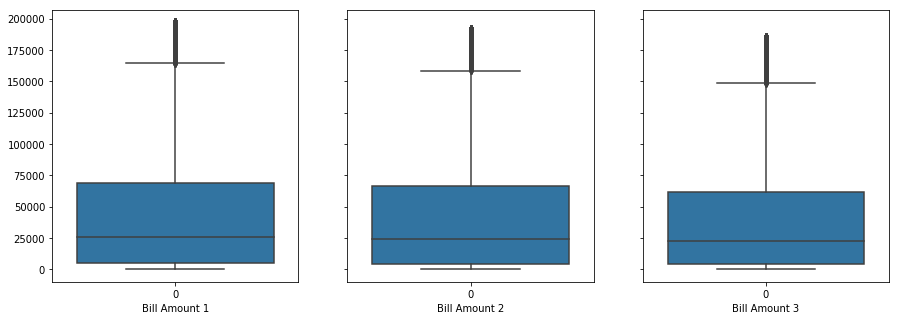

In [458]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.BILL_AMT1,ax=ax1)
g2.set_xlabel("Bill Amount 1")
g4 = sns.boxplot(data=df1.BILL_AMT2,ax=ax2)
g4.set_xlabel("Bill Amount 2")
g7 = sns.boxplot(data=df1.BILL_AMT3,ax=ax3)
g7.set_xlabel("Bill Amount 3")
plt.show()

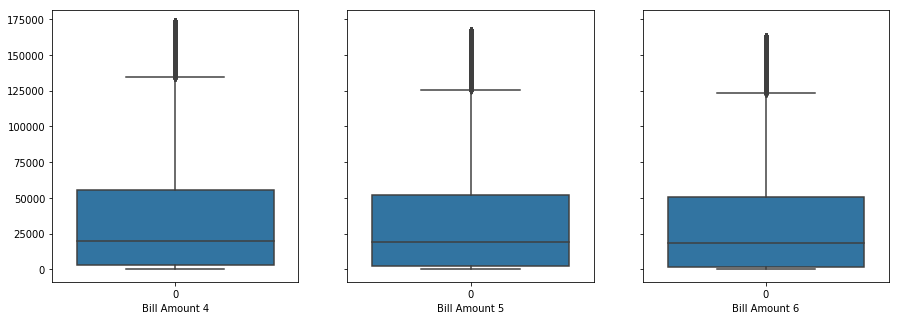

In [459]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),sharex=True, sharey=True)
ax1,ax2,ax3 = axes.flatten()
g2 = sns.boxplot(data=df1.BILL_AMT4,ax=ax1)
g2.set_xlabel("Bill Amount 4")
g4 = sns.boxplot(data=df1.BILL_AMT5,ax=ax2)
g4.set_xlabel("Bill Amount 5")
g7 = sns.boxplot(data=df1.BILL_AMT6,ax=ax3)
g7.set_xlabel("Bill Amount 6")
plt.show()

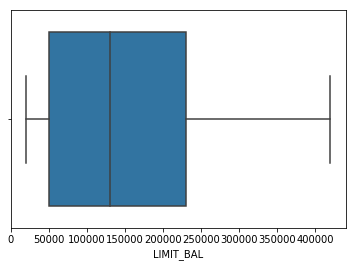

In [460]:
sns.boxplot(df1['LIMIT_BAL'])

## 4. Model Building

In [461]:
df1['PAY_1'] = df1['PAY_1'].astype(int)
df1['PAY_2'] = df1['PAY_2'].astype(int)
df1['PAY_3'] = df1['PAY_3'].astype(int)
df1['PAY_4'] = df1['PAY_4'].astype(int)
df1['PAY_5'] = df1['PAY_5'].astype(int)
df1['PAY_6'] = df1['PAY_6'].astype(int)
df1['EDUCATION'] = df1['EDUCATION'].astype('category')
df1['MARRIAGE'] = df1['MARRIAGE'].astype('category')
df1.dtypes

﻿ID                              int64
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_1                            int32
PAY_2                            int32
PAY_3                            int32
PAY_4                            int32
PAY_5                            int32
PAY_6                            int32
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                         int64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default_payment_next_month    category
Limit_Group              

### 4.1 Checking for Correlation

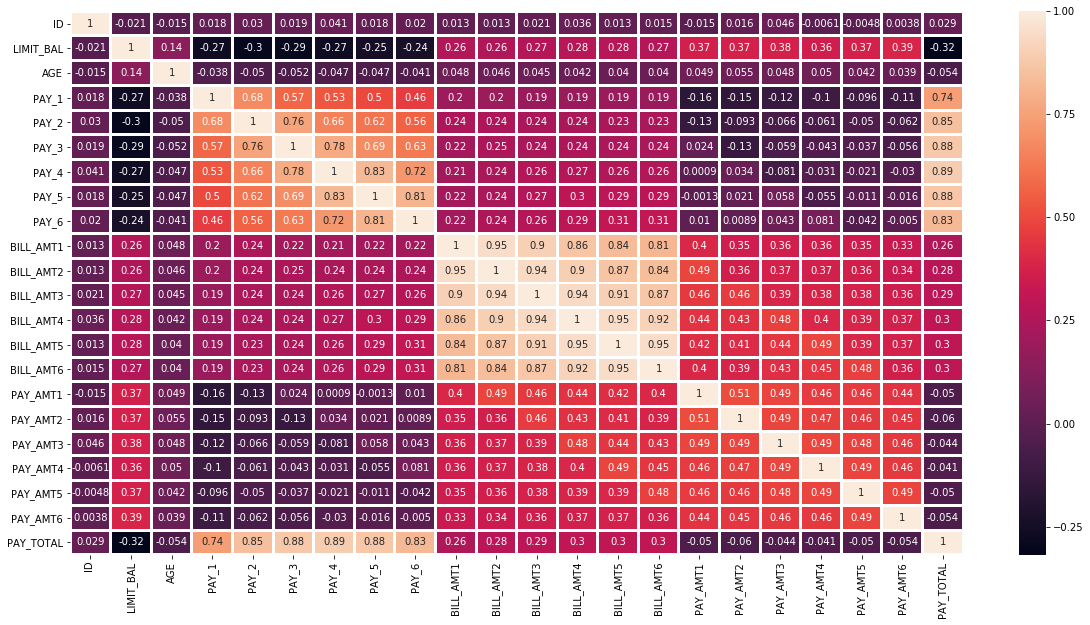

In [462]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

#### Inference
* We can see that Bill_AMT is highly correlated with each other. We will create one column TOTAL_BILL and remove the rest.

In [463]:
df1['TOTAL_BILL'] = df1['BILL_AMT1']+df1['BILL_AMT2']+df1['BILL_AMT3']+df1['BILL_AMT4']+df1['BILL_AMT5']+df1['BILL_AMT6']

##### 4.1.2 Removing correlated columns

In [464]:
df2 = df1.copy()

In [465]:
df2.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_TOTAL','Limit_Group','age_group'],axis=1,inplace=True)

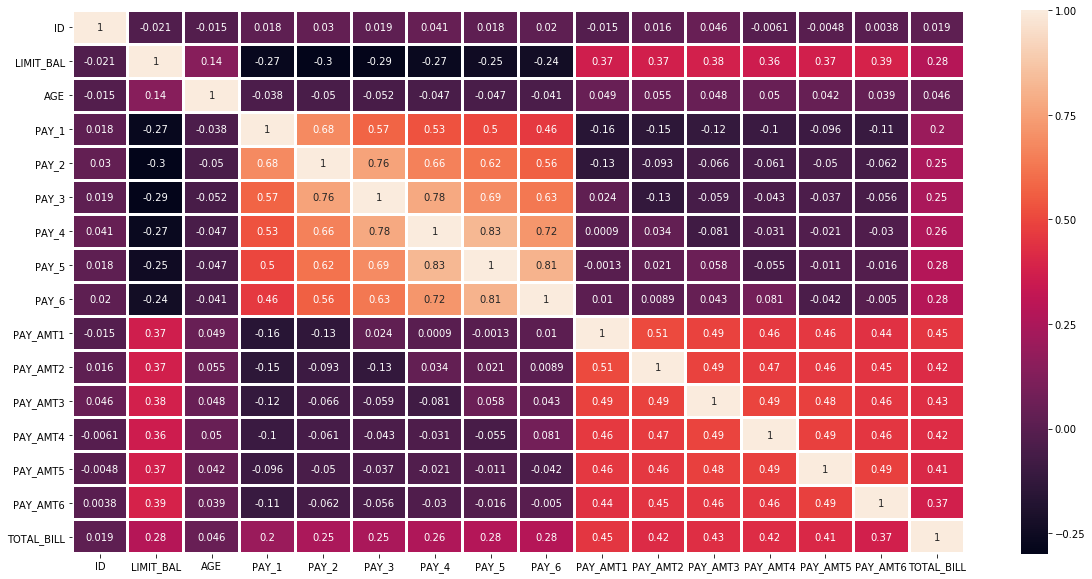

In [466]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True,linecolor='white',linewidths=2, ax=ax)
plt.show()

In [467]:
df2.columns

Index(['﻿ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'TOTAL_BILL'],
      dtype='object')

### 4.2 Over Sampling Using SMOTE since its a skewed dataset

In [468]:
X = df2.loc[:,~df2.columns.isin(['default_payment_next_month'])]
y = df2['default_payment_next_month']

In [469]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

### 4.3 Dummy Variables for Categorical Columns

In [470]:
from sklearn.preprocessing import StandardScaler
X_dummy_train = pd.get_dummies(X_train,drop_first=True,prefix_sep='_')
X_dummy_train.columns

Index(['﻿ID', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'TOTAL_BILL', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

In [471]:
os_X_train,os_y_train = os.fit_sample(X_dummy_train,y_train)
print("length of oversampled data is ",len(os_X_train))
np.bincount(os_y_train)

length of oversampled data is  21858


array([10929, 10929], dtype=int64)

In [472]:
type(os_X_train)
os_X_train[1]

array([ 1.417600e+04,  4.200000e+05,  5.200000e+01, -2.000000e+00,
       -2.000000e+00, -2.000000e+00, -2.000000e+00, -2.000000e+00,
       -2.000000e+00,  1.760865e+04,  1.800000e+04,  1.509910e+04,
        1.503465e+04,  1.507180e+04,  1.656435e+04,  5.430480e+05,
        1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00])

### 4.4 Fitting Logistic Regression Model - Without Tuning

In [473]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(random_state=7)
logreg.fit(os_X_train, os_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [474]:
# Creating dummy for test set
X_dummy_test = pd.get_dummies(X_test,drop_first=True,prefix_sep='_')

In [475]:
y_pred = logreg.predict(X_dummy_test)
print('Accuracy of logistic regression classifier without Tuning on test set: {:.2f}'.format(logreg.score(X_dummy_test, y_test)))
#metrics.accuracy_score(y_test,y_pred)

Accuracy of logistic regression classifier without Tuning on test set: 0.57


In [476]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.52      0.65      4698
           1       0.32      0.74      0.44      1419

   micro avg       0.57      0.57      0.57      6117
   macro avg       0.59      0.63      0.55      6117
weighted avg       0.74      0.57      0.60      6117



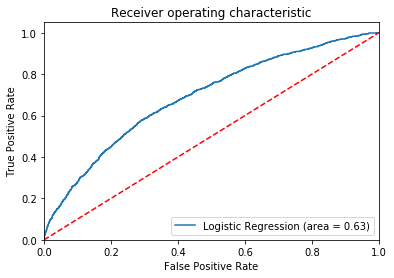

In [477]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_dummy_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### 4.3 Fitting Logistic Regression Model - Tuning

In [478]:
logreg1 = LogisticRegression(random_state=7,C=0.001,max_iter=100)
logreg1.fit(os_X_train, os_y_train)
y_pred = logreg1.predict(X_dummy_test)
print('Accuracy of logistic regression classifier with Tuning on test set: {:.2f}'.format(logreg1.score(X_dummy_test, y_test)))

Accuracy of logistic regression classifier with Tuning on test set: 0.55


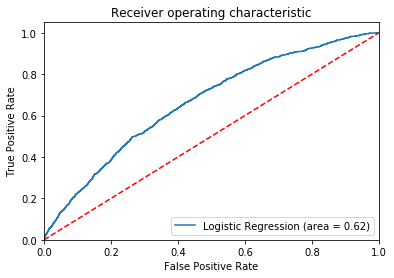

In [479]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg1.predict_proba(X_dummy_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### 4.3.1 Removing PAY_AMT and creating one feature by adding all PAY_AMT

In [480]:
df3 = df1.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Limit_Group','age_group'],axis=1)
X_new = df3.loc[:,~df3.columns.isin(['default_payment_next_month'])]
X_dummy_train_new = pd.get_dummies(X_new,drop_first=True,prefix_sep='_') # Get dummies
os1 = SMOTE(random_state=0)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_dummy_train_new, y, test_size=0.3, random_state=0)

In [481]:
import warnings
warnings.simplefilter(action='ignore') 
os_X_train_new,os_y_train_new = os.fit_sample(X_train_new,y_train_new)
logreg2 = LogisticRegression(random_state=7,C=0.1,max_iter=300,class_weight='balanced',solver='newton-cg')
logreg2.fit(os_X_train_new, os_y_train_new)
y_pred = logreg2.predict(X_test_new)
print('Accuracy of logistic regression classifier with Tuning on test set: {:.2f}'.format(logreg2.score(X_test_new, y_test_new)))

Accuracy of logistic regression classifier with Tuning on test set: 0.72


##### Newton’s Method 
Newton’s method uses in a sense a better quadratic function minimisation. A better because it uses the quadratic approximation (i.e. first AND second partial derivatives).

You can imagine it as a twisted Gradient Descent with The Hessian (The Hessian is a square matrix of second-order partial derivatives of order nxn).

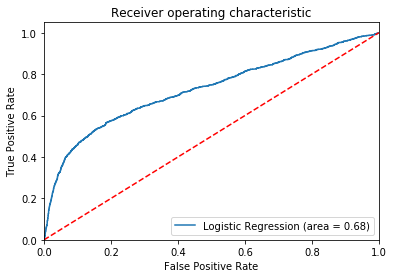

In [482]:
logit_roc_auc = roc_auc_score(y_test_new, y_pred)
fpr, tpr, thresholds = roc_curve(y_test_new, logreg2.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [483]:
print(metrics.classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      4698
           1       0.43      0.60      0.50      1419

   micro avg       0.72      0.72      0.72      6117
   macro avg       0.65      0.68      0.66      6117
weighted avg       0.76      0.72      0.74      6117



### 4.3.2 Binning Age and removing payment amount fields and using Total Bill (sum of all bill amount)

In [484]:
df1['Total_Payment_Amt'] = df1['PAY_AMT1']+df1['PAY_AMT2']+df1['PAY_AMT3']+df1['PAY_AMT4']+df1['PAY_AMT5']+df1['PAY_AMT6']

In [494]:
df3 = df1.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Limit_Group','AGE','PAY_TOTAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Total_Payment_Amt'],axis=1)
X_new = df3.loc[:,~df3.columns.isin(['default_payment_next_month'])]
X_dummy_train_new = pd.get_dummies(X_new,drop_first=True,prefix_sep='_') # Get dummies
os1 = SMOTE(random_state=0)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_dummy_train_new, y, test_size=0.3, random_state=0)
os_X_train_new,os_y_train_new = os.fit_sample(X_train_new,y_train_new)
logreg2 = LogisticRegression(random_state=7,C=0.01,max_iter=100,tol=0.00001,class_weight='balanced')
logreg2.fit(os_X_train_new, os_y_train_new)
y_pred = logreg2.predict(X_test_new)
print('Accuracy of logistic regression classifier with Tuning on test set: {:.2f}'.format(logreg2.score(X_test_new, y_test_new)))

Accuracy of logistic regression classifier with Tuning on test set: 0.76


In [495]:
logreg2

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=7,
          solver='warn', tol=1e-05, verbose=0, warm_start=False)

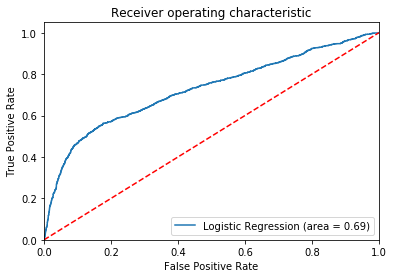

In [496]:
logit_roc_auc = roc_auc_score(y_test_new, y_pred)
fpr, tpr, thresholds = roc_curve(y_test_new, logreg2.predict_proba(X_test_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [497]:
print(metrics.classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4698
           1       0.49      0.56      0.52      1419

   micro avg       0.76      0.76      0.76      6117
   macro avg       0.68      0.69      0.68      6117
weighted avg       0.78      0.76      0.77      6117



## 5. Conclusion and Learnings
#### Model performed better with fewer features
#### Binning age improved models performance. We could clearly see that people belonging to Young age group defaulted more in EDA
#### Bill_AMT was correlated, Adding them all to create a new feature TOTAL_BILL improved the performance
#### Adjusting C- regularization parameter also improved the performance
#### Increasing tolerance also improved the performance as we chose to go for more precised theta
### We ended up with achieving an accuracy of 76, Precision-76 , Recall of 76, f1-score 76 and ROC -69